In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\\Chrome Download\\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
number_left = df[df['left'] == 1] 
number_left.shape                #Number of employee left the company   

(3571, 10)

In [4]:
retain = df[df['left'] == 0]
retain.shape                  #Number of employee who is working.

(11428, 10)

left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


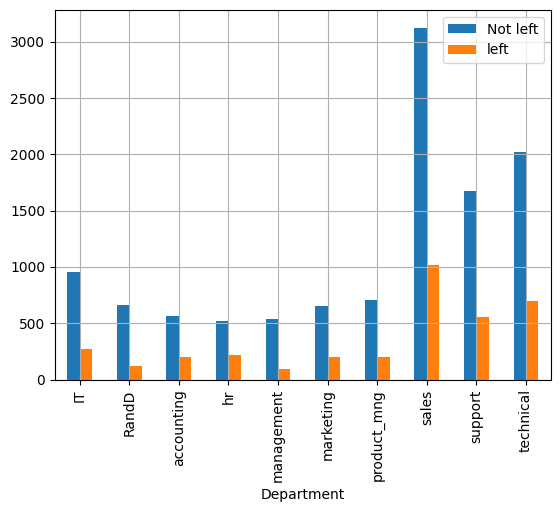

In [5]:
cross = pd.crosstab(df.Department,df.left)
print(cross)
plot = cross.plot(kind='bar')
plot.legend(['Not left','left'])
plot.grid()

**Point**  
Sales department employees are left as compare to others but the number of employees is also high in sales department.

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


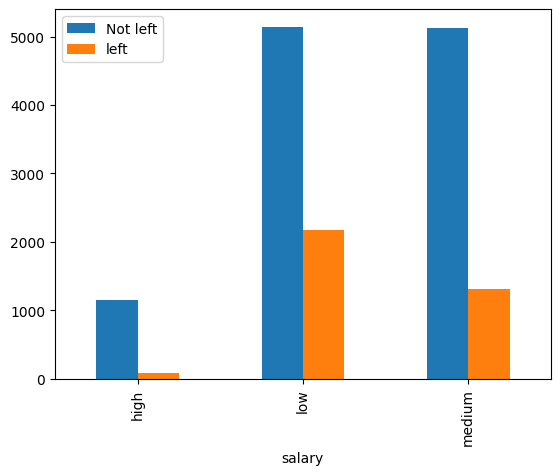

In [6]:
salary_cross = pd.crosstab(df['salary'],df['left'])
print(salary_cross)
salary_plot = salary_cross.plot(kind='bar')
salary_plot.legend(['Not left','left'])

**Point**  
Low salary employees are the more who left the company.

**Logestic Regression(Multiclass Classification)**  
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure.

In [7]:
from sklearn.datasets import load_iris
import mglearn

In [8]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
iris_dataset['target_names'] # 0 = setosa, 1 =versicolor,2 = virginca 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],test_size=0.2)

In [11]:
y_train

array([2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1,
       2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0,
       1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 0, 0])

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
model.predict([[5,2.9,1,0.2]])

array([0])

In [15]:
model.score(X_test,y_test)

0.9333333333333333

**Decision Tree**  
A decision tree is a type of supervised learning algorithm that is commonly used in machine learning to model and predict outcomes based on input data. It is a tree-like structure where each internal node tests on attribute, each branch corresponds to attribute value and each leaf node represents the final decision or prediction. The decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.  
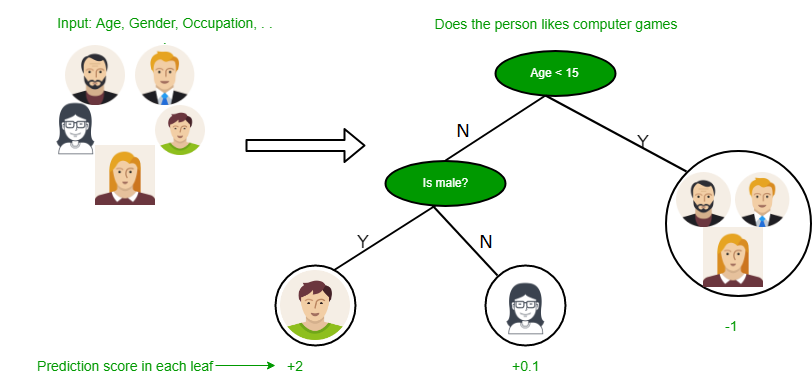

In [16]:
df = pd.read_csv("D:\\Chrome Download\\titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [18]:
trainX = df.drop(['Survived'],axis='columns')
trainX


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [19]:
target = df['Survived']

In [20]:
trainX['Sex'] = trainX['Sex'].map({'male':1,'female':2})
trainX

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,2,19.0,30.0000
888,3,2,NaN,23.4500
889,1,1,26.0,30.0000


In [21]:
trainX['Age'] = trainX['Age'].fillna(np.mean(trainX['Age']))
trainX

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(trainX,target,test_size=0.2)

In [23]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
model.score(X_test,y_test)

0.7486033519553073

**Support Vector Machine**  
A support vector machine (SVM) is a type of supervised learning algorithm used in machine learning to solve classification and regression tasks; SVMs are particularly good at solving binary classification problems, which require classifying the elements of a data set into two groups.  
Some of the most popular kernel functions for SVMs are the following:

**Linear kernel** - This is the simplest kernel function, and it maps the data to a higher-dimensional space, where the data is linearly separable.  
**Polynomial kernel**- This kernel function is more powerful than the linear kernel, and it can be used to map the data to a higher-dimensional space, where the data is non-linearly separable.  
**RBF kernel** -This is the most popular kernel function for SVMs, and it is effective for a wide range of classification problems.
Sigmoid kernel. This kernel function is similar to the RBF kernel, but it has a different shape that can be useful for some classification problems.

In [26]:
from sklearn.datasets import load_digits
digit = load_digits()

In [27]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
df = pd.DataFrame(digit.data,digit['target'])
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [29]:
df['target'] = digit.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [30]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis='columns'),df.target,test_size=0.3)

In [ ]:
from sklearn.svm import SVC
model1  = SVC(kernel='rbf')       #taking the rbf kernal

In [32]:
type(y_train)

pandas.core.series.Series

In [33]:
model1.fit(X_train,y_train)

SVC()

In [34]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
9,0.0,0.0,5.0,13.0,15.0,6.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,7.0,14.0,16.0,11.0,1.0,0.0
5,0.0,0.0,8.0,12.0,14.0,12.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,8.0,14.0,16.0,4.0,0.0,0.0
8,0.0,0.0,11.0,10.0,12.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,11.0,14.0,12.0,4.0,0.0,0.0
4,0.0,0.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,0.0,0.0
3,0.0,0.0,6.0,12.0,16.0,10.0,0.0,0.0,0.0,4.0,...,8.0,0.0,0.0,0.0,5.0,16.0,14.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.0,0.0,0.0,0.0,13.0,16.0,6.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,1.0,12.0,14.0,5.0,0.0
0,0.0,0.0,8.0,14.0,11.0,2.0,0.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,5.0,16.0,16.0,7.0,0.0,0.0
4,0.0,0.0,0.0,8.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,14.0,0.0,0.0,0.0
2,0.0,3.0,15.0,15.0,3.0,0.0,0.0,0.0,0.0,8.0,...,5.0,0.0,0.0,5.0,16.0,16.0,16.0,16.0,16.0,0.0


**Random Forest**  
Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the bagging method. The general idea of the bagging method is that a combination of learning models increases the overall result.   $\\$


**Hyperparameters:-**  


**1-n_estimators:**  
 which is just the number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.  $\\$  
**2-max_features:** which is the maximum number of features random forest considers to split a node.

**3-min_sample_leaf:** This determines the minimum number of leafs required to split an internal node.

**4-n_job:** It  tells the engine how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.

**5-random_state:** It  makes the model’s output replicable. The model will always produce the same results when it has a definite value of random_state and if it has been given the same hyperparameters and the same training data.

**6-Oob_score :** which is a random forest cross-validation method. In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out-of-bag samples. It’s very similar to the leave-one-out-cross-validation method, but almost no additional computational burden goes along with it.

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],test_size=0.2)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [37]:
model.score(X_test,y_test)

0.9666666666666667

In [38]:
y_predict = model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

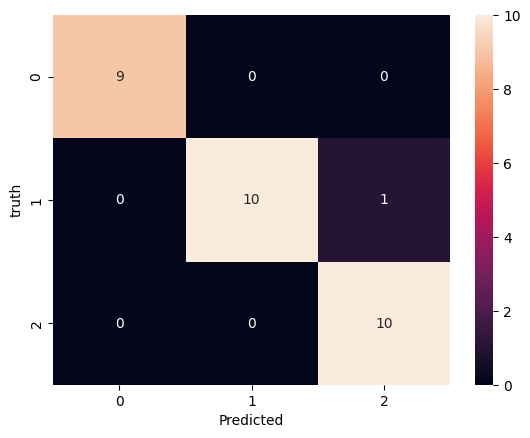

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("truth")

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(LogisticRegression(solver='sag',multi_class='auto'),iris_dataset['data'],iris_dataset['target'],cv=10)


array([1.        , 1.        , 1.        , 1.        , 0.93333333,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

In [43]:
cross_val_score(SVC(gamma='auto'),iris_dataset['data'],iris_dataset['target'],cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [44]:
cross_val_score(RandomForestClassifier(n_estimators=10),iris_dataset['data'],iris_dataset['target'],cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

**K Fold Cross Validation**  
It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance.  


In [45]:
score = cross_val_score(RandomForestClassifier(n_estimators=10),iris_dataset['data'],iris_dataset['target'],cv=10)
np.average(score)

0.9400000000000001

**K Means**  
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [47]:
df_f = pd.DataFrame(iris_dataset['data'],columns=iris_dataset['feature_names'])
df_f

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
df = df_f.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


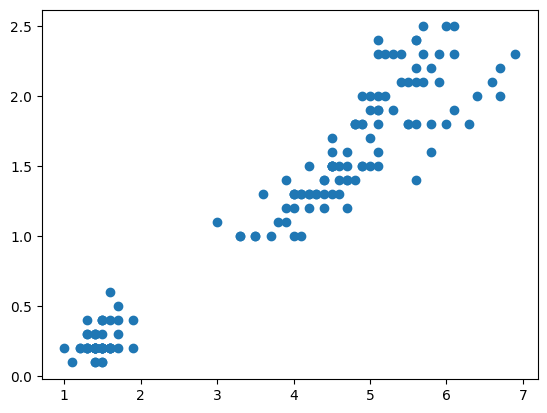

In [49]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [50]:
Km = KMeans(n_clusters=2)
y_predict = Km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
df['cluster'] = y_predict
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [52]:
Km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

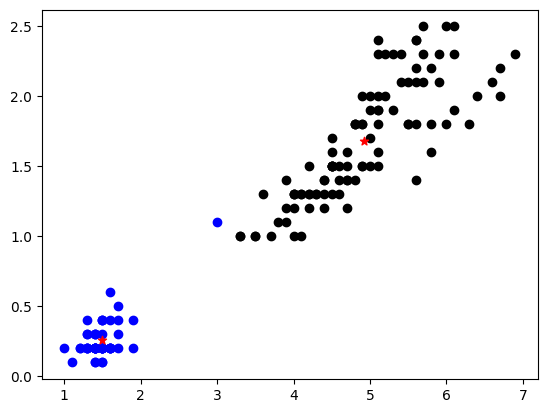

In [53]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'black')
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color='red',marker='*')

**Some Errors are found in above plot**

In [54]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']] = scaler.transform(df[['petal width (cm)']])

In [55]:
Km = KMeans(n_clusters=2)
y_predict = Km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
df['cluster'] = y_predict
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


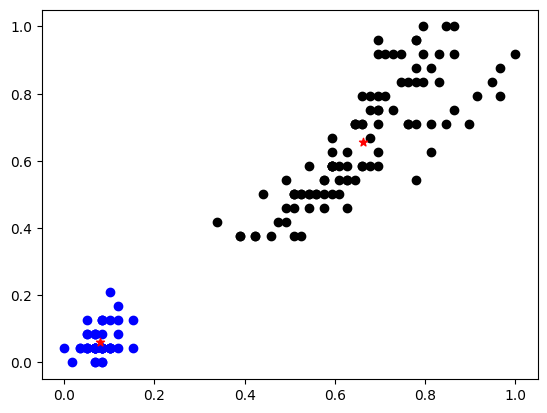

In [57]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'black')
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color='red',marker='*')

**Elbow Plot**  
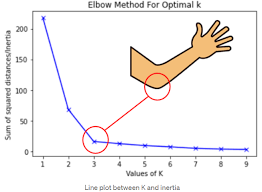

In [58]:
sse = []

k_rng = range(1,10)

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

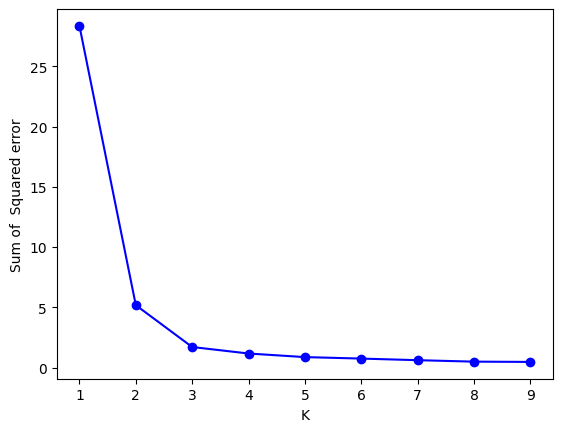

In [59]:
plt.xlabel("K")
plt.ylabel("Sum of  Squared error")
plt.plot(k_rng,sse,'o-',color='blue')
plt.show()

**Naive Bayes Tutorial**  
It is a classification technique based on Bayes’ Theorem with an independence assumption among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [60]:
from sklearn.datasets import load_wine
wine = load_wine()
wine_data = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [61]:
wine_data['target'] = wine['target']
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(wine['data'],wine.target,test_size=0.3)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model_1 = GaussianNB()
model_1.fit(X_train,y_train)

GaussianNB()

In [64]:
model_2 = MultinomialNB()
model_2.fit(X_train,y_train)

MultinomialNB()

In [65]:
model_1.score(X_test,y_test)

1.0

In [66]:
model_2.score(X_test,y_test)

0.9074074074074074

**Grid Search**  
GridSearchCV acts as a valuable tool for identifying the optimal parameters for a machine learning model. Imagine you have a machine learning model with adjustable settings, known as hyperparameters, that can enhance its performance. GridSearchCV aids in pinpointing the best combination of these hyperparameters automatically.

Here’s the process: You provide GridSearchCV with a set of Scoring parameter to experiment with, and it systematically explores each possible combination. For every combination, it evaluates the model’s performance by testing it on various sections of the dataset to gauge its accuracy.

In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [68]:
digit = load_digits()

In [69]:
df = pd.DataFrame(digit['data'],digit['target'])
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [70]:
df['target'] = digit['target']
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [71]:
model_params = {
    # 'svm' : {
    #     'model' : svm.SVC(gamma='auto'), 
    #     'params' : {
    #         'C' : [1,10,20],
    #         'kernal':['rbf','linear']
    #     }
    # },
    'random_forest' : {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model' : LogisticRegression(solver = 'liblinear',multi_class='auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'navie_bayes_gau': {
        'model' : GaussianNB(),
        'params': {}
    },
    
    'navies_bayes_mult':{
        'model':MultinomialNB(),
        'params':{}
        
    },
    'decisin_tree':{
        'model' : DecisionTreeClassifier(),
        'params' : { 
            'criterion': ['gini','entropy'],
        }
    }
}

In [72]:
from sklearn.model_selection import GridSearchCV

score = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(digit.data,digit.target)
    score.append({'model' : model_name,
                  'best_score':clf.best_score_,
                  'best_params': clf.best_params_
                  })

In [73]:
df = pd.DataFrame(score,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.907112,{'n_estimators': 10}
1,logistic_regression,0.922114,{'C': 1}
2,navie_bayes_gau,0.806928,{}
3,navies_bayes_mult,0.870350,{}
4,decisin_tree,0.810271,{'criterion': 'entropy'}


In [74]:
df = pd.read_csv("D:\\Data Analysis\\machine learning\\Data For Practice\\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [76]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000
